In [1]:
# Install required libraries (only do this once in your environment)
# !pip install pandas matplotlib seaborn scikit-learn

# Import the necessary libraries
import pandas as pd      # For data handling
import numpy as np       # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns    # For better visualizations
from sklearn.linear_model import LinearRegression  # For regression
from sklearn.model_selection import train_test_split  # To split data
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation


In [2]:
!pip install pandas matplotlib seaborn scikit-learn




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
print("Pandas version:", pd.__version__)


Pandas version: 2.3.1


In [5]:
df = pd.read_csv("advertising.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
print(df.columns)


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [11]:
print(df.columns)


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


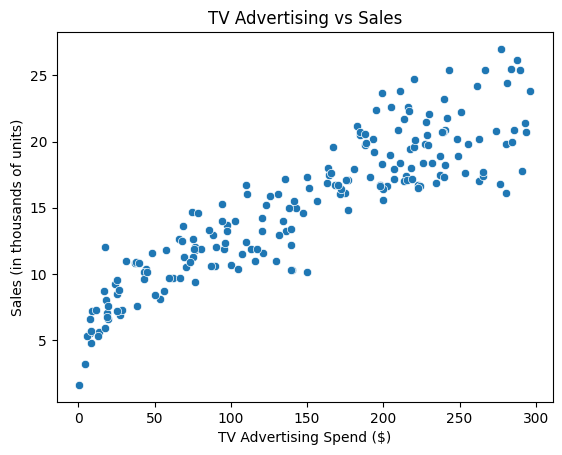

In [12]:
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("TV Advertising vs Sales")
plt.xlabel("TV Advertising Spend ($)")
plt.ylabel("Sales (in thousands of units)")
plt.show()


In [13]:
X = df[['TV']]     # Independent variable (note the double brackets for 2D)
y = df['Sales']    # Dependent variable


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()        # Create the model
model.fit(X_train, y_train)       # Train it on training data


LinearRegression()

In [16]:
print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])


Intercept (b0): 7.007108428241848
Slope (b1): 0.0554829439314632


In [18]:
y_pred = model.predict(X_test)



In [19]:
comparison = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred})
print(comparison.head())


     Actual Sales  Predicted Sales
95           16.9        16.067473
15           22.4        17.848476
30           21.4        23.258063
158           7.3         7.656259
128          24.7        19.230001


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)     # Avg error in units
mse = mean_squared_error(y_test, y_pred)      # Penalizes large errors
rmse = mse ** 0.5                             # Same unit as Sales
r2 = r2_score(y_test, y_pred)                 # 0 to 1 (1 = perfect fit)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)


Mean Absolute Error (MAE): 1.9502948931650088
Mean Squared Error (MSE): 6.101072906773963
Root Mean Squared Error (RMSE): 2.470035001123256
R-squared (R2 Score): 0.802561303423698


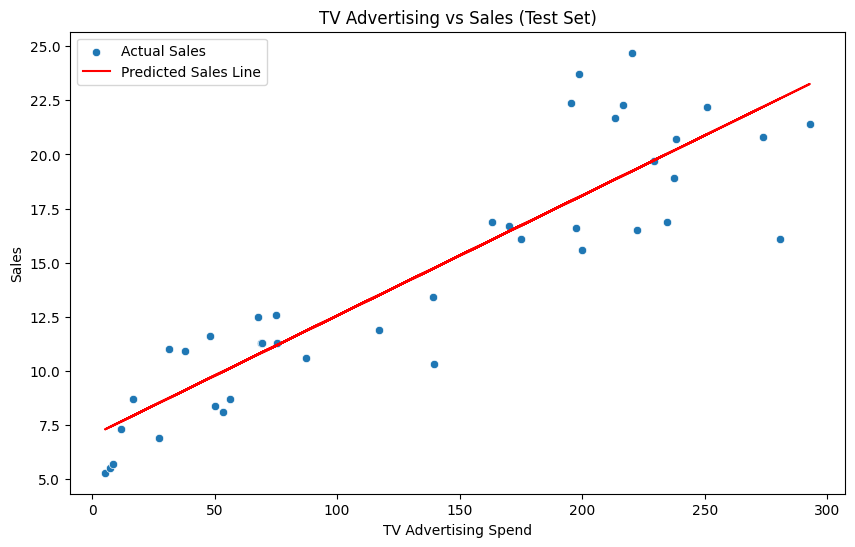

In [21]:
# Plotting the regression line over the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['TV'], y=y_test, label='Actual Sales')
plt.plot(X_test['TV'], y_pred, color='red', label='Predicted Sales Line')
plt.title('TV Advertising vs Sales (Test Set)')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.legend()
plt.show()
